<a id='sec_Notebooks_oraculos'></a> 
# Oráculos (funciones digitales)


- **[1 - Construcción de funciones binarias. Los min-términos](#sec_Notebooks_oraculos_1)**
- **[2 - Función binaria lineal](#sec_Notebooks_oraculos_2)**

In [1]:
# No olvidar que en "Google colab" hay que instalar qiskit

########################
# Instala versión 0.45.2
########################
# Importante, poner qiskit-aer en la misma linea de "pip install" para que coja la versión adecuada
try:
    import google.colab
    print("In colab, let's install things...")
    #
    !pip install qiskit[visualization]==0.45.2 qiskit-aer qiskit-ibm-runtime ipywidgets
except ImportError:
    print("NOT in colab")

NOT in colab


In [2]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit import transpile
from qiskit.circuit.library import MCXGate
import numpy as np
from qiskit_aer import AerSimulator

In [3]:
# Importamos el simulador. Con "method" le especificamos el método de simulación
simulador = AerSimulator(method = 'statevector')

<a id='sec_Notebooks_oraculos_1'></a>
##  Construcción de funciones binarias. Los min-términos 

Consideremos la siguiente tabla de verdad para una función $f: \{0, 1\}^3 \rightarrow \{0, 1\}$ concreta.
<br>

|$$x_2$$|$$x_1$$|$$x_0$$|$$f(x)$$|
|---|---|---|---|
|0|0|0|0|
|0|0|1|1|
|0|1|0|0|
|0|1|1|0|
|1|0|0|0|
|1|0|1|1|
|1|1|0|0|
|1|1|1|1|

La idea es considerar exclusivamente los términos que tienen como salida la variable 1, que denominaremos <b>min-términos</b>. 

Cada min-término llevará asociada una puerta condicionada diferente. Su composición define la función $f$

Para el caso de la tabla de verdad anterior, el circuito correspondiente vendrá dado por:

In [5]:
qr = QuantumRegister(6)
cr = ClassicalRegister(4)

qc = QuantumCircuit(qr, cr, name='q')

for i in range(len(qr[:])):
    print(qr[i])

Qubit(QuantumRegister(6, 'q1'), 0)
Qubit(QuantumRegister(6, 'q1'), 1)
Qubit(QuantumRegister(6, 'q1'), 2)
Qubit(QuantumRegister(6, 'q1'), 3)
Qubit(QuantumRegister(6, 'q1'), 4)
Qubit(QuantumRegister(6, 'q1'), 5)


/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny_2/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


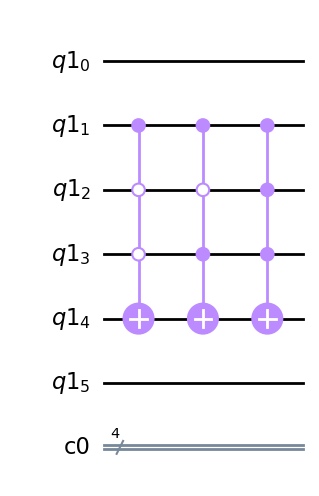

In [6]:
qc.append(MCXGate(3, ctrl_state=1), qr[1:5])
qc.append(MCXGate(3, ctrl_state=5), qr[1:5])
qc.append(MCXGate(3, ctrl_state=7), qr[1:5])

qc.draw(output='mpl')

donde hemos hecho uso de la puerta multicontrolada [MCXGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.MCXGate.html?highlight=mcxgate#qiskit.circuit.library.MCXGate) de qiskit

Vamos a implementar una función $f:\{0,1\}^n\to \{0,1\}^m$, con $n=m=4$, dada por la siguiente *tabla de verdad* 
<br>

|$$x$$|$$f(x)$$|$$x$$|$$f(x)$$|
|---|---|---|---|
|0000|1111|1000|0101|
|0001|1011|1001|0100|
|0010|0011|1010|0000|
|0011|1000|1011|1110|
|0100|0101|1100|1111|
|0101|0100|1101|1011|
|0110|0000|1110|0011|
|0111|1110|1111|1000|

<br>

<div class="alert alert-block alert-success">
<p style="color: DarkGreen;">
<b>Ejercicio</b>: 
<br>        
Completa la el código que genera un circuito que implementa la siguiente función digital
<br> 
</p>
<details><summary> >> <i>Solución</i> </summary>
    if output_bit =='1':
        qc.append(MCXGate(len(input_str), ctrl_state=ctrl_state),qr_input[:]+[qr_output[j]])
</details>
</div>

In [7]:
def oracle(f_outputs): 
    
    two_power_n = len(f_outputs)   # 2**n
    
    n = int(np.log2(two_power_n))  # dimension del registro de entrada |x> 
    m = len(f_outputs[0])          # dimension del registro de salida |f(x)>
    
    assert two_power_n == 2**n
    
    # generamos todos los posibles inputs en binario, completando con ceros hasta tener strings de n bits
    inputs = [format(i, 'b').zfill(n) for i in range(two_power_n)]
    print(inputs)
    
    qr_input = QuantumRegister(n, name='input')
    qr_output = QuantumRegister(m, name='output')
    qc = QuantumCircuit(qr_input, qr_output)


    # Hacemos un bucle sobre los inputs
    #for i,input_str in enumerate(inputs):
    for i in range(len(inputs)):
        input_str = inputs[i]
        ctrl_state= int(input_str,2)
        print("Input : ", i, input_str ,ctrl_state)
        
        # Para cada input, i, hacemos un bucle sobre cada bit del output     
        #for j,output_bit in enumerate(f_outputs[i]):
        print("Output : ", f_outputs[i])
        for j in range(len(f_outputs[i])):
            output_bit = f_outputs[i][len(f_outputs[i])-1-j]
            #print(j, output_bit) 
            pass ## Elimina esto al añadir la solución
###
#
#        Tu solución aquí
#
#        Pista: Busca los 1 en la salida y aplica una puerta controlada por el estado de entrada que aplique este uno
#
####
    return qc

In [8]:
f_outputs = ['1111', '1011', '0011', '1000', '0101', '0100', 
               '0000', '1110', '0101', '0100', '0000', '1110', 
               '1111', '1011', '0011', '1000']

# f_outputs= ['000', '001', '010', '011', '100', '101', '110', '111']
    
   
oracle(f_outputs).draw()

['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
Input :  0 0000 0
Output :  1111
Input :  1 0001 1
Output :  1011
Input :  2 0010 2
Output :  0011
Input :  3 0011 3
Output :  1000
Input :  4 0100 4
Output :  0101
Input :  5 0101 5
Output :  0100
Input :  6 0110 6
Output :  0000
Input :  7 0111 7
Output :  1110
Input :  8 1000 8
Output :  0101
Input :  9 1001 9
Output :  0100
Input :  10 1010 10
Output :  0000
Input :  11 1011 11
Output :  1110
Input :  12 1100 12
Output :  1111
Input :  13 1101 13
Output :  1011
Input :  14 1110 14
Output :  0011
Input :  15 1111 15
Output :  1000


input_0: 
          
 input_1: 
          
 input_2: 
          
 input_3: 
          
output_0: 
          
output_1: 
          
output_2: 
          
output_3:

<div class="alert alert-block alert-success">
<p style="color: DarkGreen;">
<b>Ejercicio</b>: 
<br>        
Escribe una función $f:S^n\to S$  que  produzca aleatoriamente $f(x) = \pm 1$ de forma <i>equilibrada</i> (es decir, tantos $f(x)= +1$ como $f(x)= -1$). 
<br> 
</p>
<details><summary> >> <i>Solución</i> </summary>

Ver por ejemplo la solución del qiskit textbook:https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html   sección 4.4 
    
</details>
</div>


<a id='sec_Notebooks_oraculos_2'></a>
## Función binaria lineal
 

Dados dos n-tuplas binarias $x=(x_{n-1},\ldots,x_0)$ y $a=(a_{n-1},\ldots,a_0)$ definimos la **función lineal**
<br>
        
\begin{equation}
f(x;a) = a \cdot x = a_{n-1} x_{n-1} \oplus a_{n-2} x_{n-2} \oplus \cdots \oplus a_{0} x_{0}\; ,
\end{equation}

<br>
donde  $\oplus$ es la suma módulo 2.

Por ejemplo, el circuito que implementa esta función cuando $a=11010$ es el siguiente

<br>
<br>

<figure><center>
<img src="Figuras/Fig_InitialOracle_linear_function.png" align=center alt="" width='400px'/>
</center></figure>

<div class="alert alert-block alert-success">
<p style="color: DarkGreen;">
<b>Ejercicio</b>: 
<br>        
Completa el siguiente código que genera el circuito asociado a la función binaria lineal $f(x;a)$. 
<br> 
</p>
<details><summary> >> <i>Solución</i> </summary>

    # for i, aq in enumerate(reversed(a)):
    for i in range(len(a)):
        aq = a[len(a)-1 -i]    
        if aq == '1':
             qc.cx(qr_in[i],qr_out) 
    
</details>
</div>

In [45]:
def linear_circuit(x,a):
       
    assert(len(x)==len(a))

    # Inicialización de los registros
    qr_in = QuantumRegister(len(a), name='qr_in')
    qr_out = QuantumRegister(1, name='qr_out')
    cr = ClassicalRegister(1, name='cr')  
    qc = QuantumCircuit(qr_in, qr_out, cr, name='q_linear')
    
    'inicializamo el estado x '
    # Recorremos la cadena x y vamos aplicando puertas X donde haya un 1 para inicializar el circuito
    #for i, xq in enumerate(reversed(x)):  # ojo con la ordenación de qiskit, por eso está reversed()
    for i in range(len(x)):
        xq = x[len(x)-1 -i] # Recorremos x al reves porque la ordenación de qiskit es al reves      
        print(i, xq)
        if xq == '1':
             qc.x(qr_in[i]) 

    qc.barrier()

    'codificamos la función lineal x.a '
###
#
#        Tu solución aquí
#
#
####
            
    qc.barrier()
    qc.measure(qr_out[0],cr[0])
    
    return qc 

Veamos un ejemplo

0 1
1 0
2 1
3 1


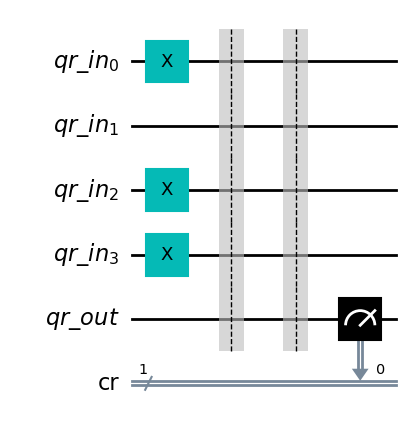

In [46]:
a = '1011'
x = '1101'

circuit = linear_circuit(x,a)
circuit.draw('mpl')

La función $a\cdot x = (1 + 0 + 0 + 1)mod(2) = 0$. Vamos a ver si este resultado es el hallado

In [47]:
# transpilamos
t_circuit = transpile(circuit, backend = simulador)

# Ejecutamos la simulación con 1000 shots 
result = simulador.run(t_circuit, shots = 1000).result()
counts = result.get_counts()
counts

{'0': 1000}

In [48]:
import qiskit.tools.jupyter
%qiskit_version_table